##import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller

###Loading and Transforming Data


In [4]:
df=pd.read_csv('013 IndexE8.csv')
df_comp=df.copy()
df_comp.date=pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index('date',inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [5]:
df_comp.columns

Index(['spx', 'dax', 'ftse', 'nikkei'], dtype='object')

In [6]:
df_comp['market_value']=df_comp.ftse


In [7]:
size=int(len(df_comp)*0.8)
df_train=df_comp.iloc[:size]
df_test=df_comp.iloc[size:]

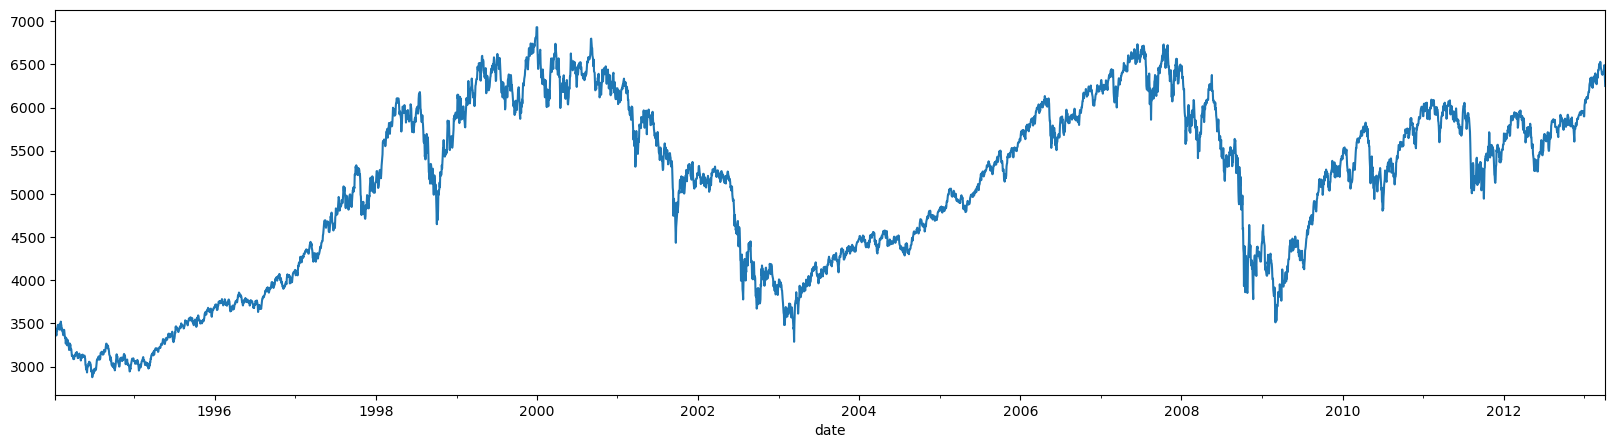

In [8]:
df_train.market_value.plot(figsize=(20,5))
plt.show()

###Stationarity

In [9]:
import statsmodels.tsa.stattools as sts

In [ ]:
#sts.adfuller(df_train.market_value)

###Differencing

In [ ]:
# def difference(dataset,interval=1):
#   diff=list()
#   for i in range(interval,len(dataset)):
#     value=dataset[i]-dataset[i-interval]
#     diff.append(value)
#   return diff

In [ ]:
#df_diff=difference(df_train.market_value)

In [ ]:
#sts.adfuller(df_diff)

###Auto ARIMA



In [10]:
pip install pmdarima

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


In [2]:
from pmdarima import auto_arima

In [9]:
auto_arima_model=auto_arima(df_train.market_value)


In [ ]:
auto_arima_model

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
 auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5021
Model:               SARIMAX(1, 1, 3)   Log Likelihood              -27590.723
Date:                Fri, 28 May 2021   AIC                          55191.447
Time:                        13:52:07   BIC                          55224.053
Sample:                             0   HQIC                         55202.873
                               - 5021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3589      0.087     -4.105      0.000      -0.530      -0.188
ma.L1          0.3391      0.087      3.898      0.000       0.169       0.510
ma.L2         -0.0589      0.010     -5.995      0.000      -0.078      -0.040
ma.L3         -0.1001      0.009    -10.847      0.000      -0.118      -0.082
sigma2      3487.1719     41.898     83.229      0.000    3405.052    3569.291
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2996.56
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###Important Argument

In [ ]:
auto_arima_model=auto_arima(y=df_train.market_value,X=df_train[['spx','dax']],max_order=None,max_p=7,max_q=7,max_d=2
                            ,m=5,max_P=4,max_Q=4,max_D=2,maxiter=50)

#max_order = maximum p+ q

In [ ]:
auto_arima_model=auto_arima(y=df_comp.market_value,X=df_comp[['spx','dax']],max_order=None,max_p=7,max_q=7,max_d=2
                            ,m=5,max_P=4,max_Q=4,max_D=2,maxiter=50,out_of_sample_size=int(len(df_comp)*0.2))
#too many exe time
#max_order = maximum p+ q

In [ ]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 5021
Model:             SARIMAX(3, 1, 1)x(2, 0, 1, 5)   Log Likelihood              -24997.860
Date:                           Fri, 28 May 2021   AIC                          50015.720
Time:                                   14:12:14   BIC                          50080.932
Sample:                               01-07-1994   HQIC                         50038.572
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            0.4312      0.031     14.075      0.000       0.371       0.491
dax            0.5855      0.005    111.339      0.000       0.575       0.596
ar.L1          0.2811      0.147      1.918      0.055      -0.006       0.568
ar.L2          0.0009      0.017      0.053      0.958      -0.033       0.035
ar.L3         -0.0559      0.013     -4.172      0.000      -0.082      -0.030
ma.L1         -0.3708      0.148     -2.513      0.012      -0.660      -0.082
ar.S.L5        0.3925      0.183      2.141      0.032       0.033       0.752
ar.S.L10      -0.0344      0.013     -2.560      0.010      -0.061      -0.008
ma.S.L5       -0.4169      0.182     -2.285      0.022      -0.774      -0.059
sigma2      1238.6922     14.376     86.165      0.000    1210.516    1266.868
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5421.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.08
Prob(H) (two-sided):                  0.41   Kurtosis:                         8.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_arima_model

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 0, 1, 5),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
int(len(df_comp)*0.2)

1255

In [ ]:
out_of_sample_size= test_size
in_of_sample_size= train_size